In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project-da/simulations.csv


In [2]:
data = pd.read_csv("../input/project-da/simulations.csv")

<AxesSubplot:xlabel='Mass of Most Massive Black Hole', ylabel='Cluster Mass'>

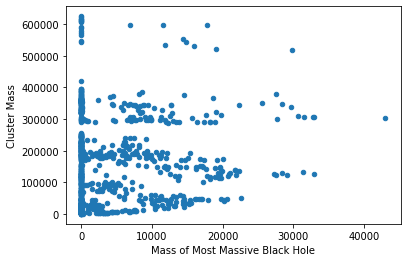

In [3]:
#df = pd.read_csv('../input/project-da/simulations.csv', usecols=['Galactocentric Raidus','Mass of Most Massive Black Hole', 'Cluster Mass']).drop_duplicates(keep='first').reset_index()
data.plot(kind='scatter',x='Mass of Most Massive Black Hole',y='Cluster Mass') # scatter plot

<AxesSubplot:xlabel='Binary Black Holes', ylabel='Cluster Metallicity'>

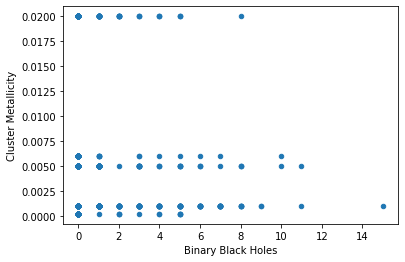

In [4]:
#Binary Black Holes
#Cluster Metallicity
data.plot(kind='scatter',x='Binary Black Holes',y='Cluster Metallicity') # scatter plot

<AxesSubplot:xlabel='Single Black Holes', ylabel='Cluster Metallicity'>

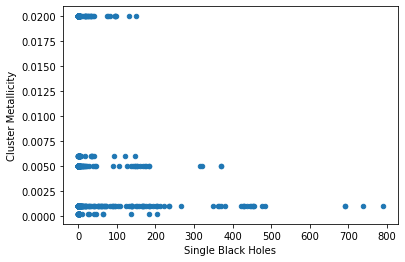

In [5]:
data.plot(kind='scatter',x='Single Black Holes',y='Cluster Metallicity') # scatter plot

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 24 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Galactocentric Raidus                                                                              1296 non-null   float64
 1   Cluster Metallicity                                                                                1296 non-null   float64
 2   Number of Objects in the Cluster                                                                   1296 non-null   int64  
 3   Cluster Mass                                                                                       1296 non-null   float64
 4   Observational Core Radius                                                                          1296 non-null   float

(array([623.,   0., 350.,   0.,   0.,   0.,   0.,   0.,   0., 323.]),
 array([0.0002 , 0.00218, 0.00416, 0.00614, 0.00812, 0.0101 , 0.01208,
        0.01406, 0.01604, 0.01802, 0.02   ]),
 <BarContainer object of 10 artists>)

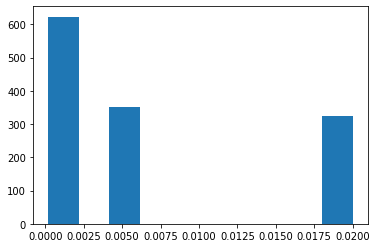

In [7]:
plt.hist(data['Cluster Metallicity'])

<AxesSubplot:xlabel='Mass of Most Massive Black Hole', ylabel='Central Velocity Dispersion 3d'>

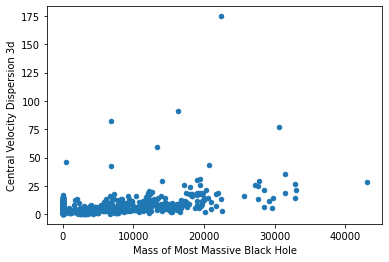

In [8]:
#Mass of Most Massive Black Hole
#Central Velocity Dispersion 3d
data.plot(kind='scatter',x='Mass of Most Massive Black Hole',y='Central Velocity Dispersion 3d')

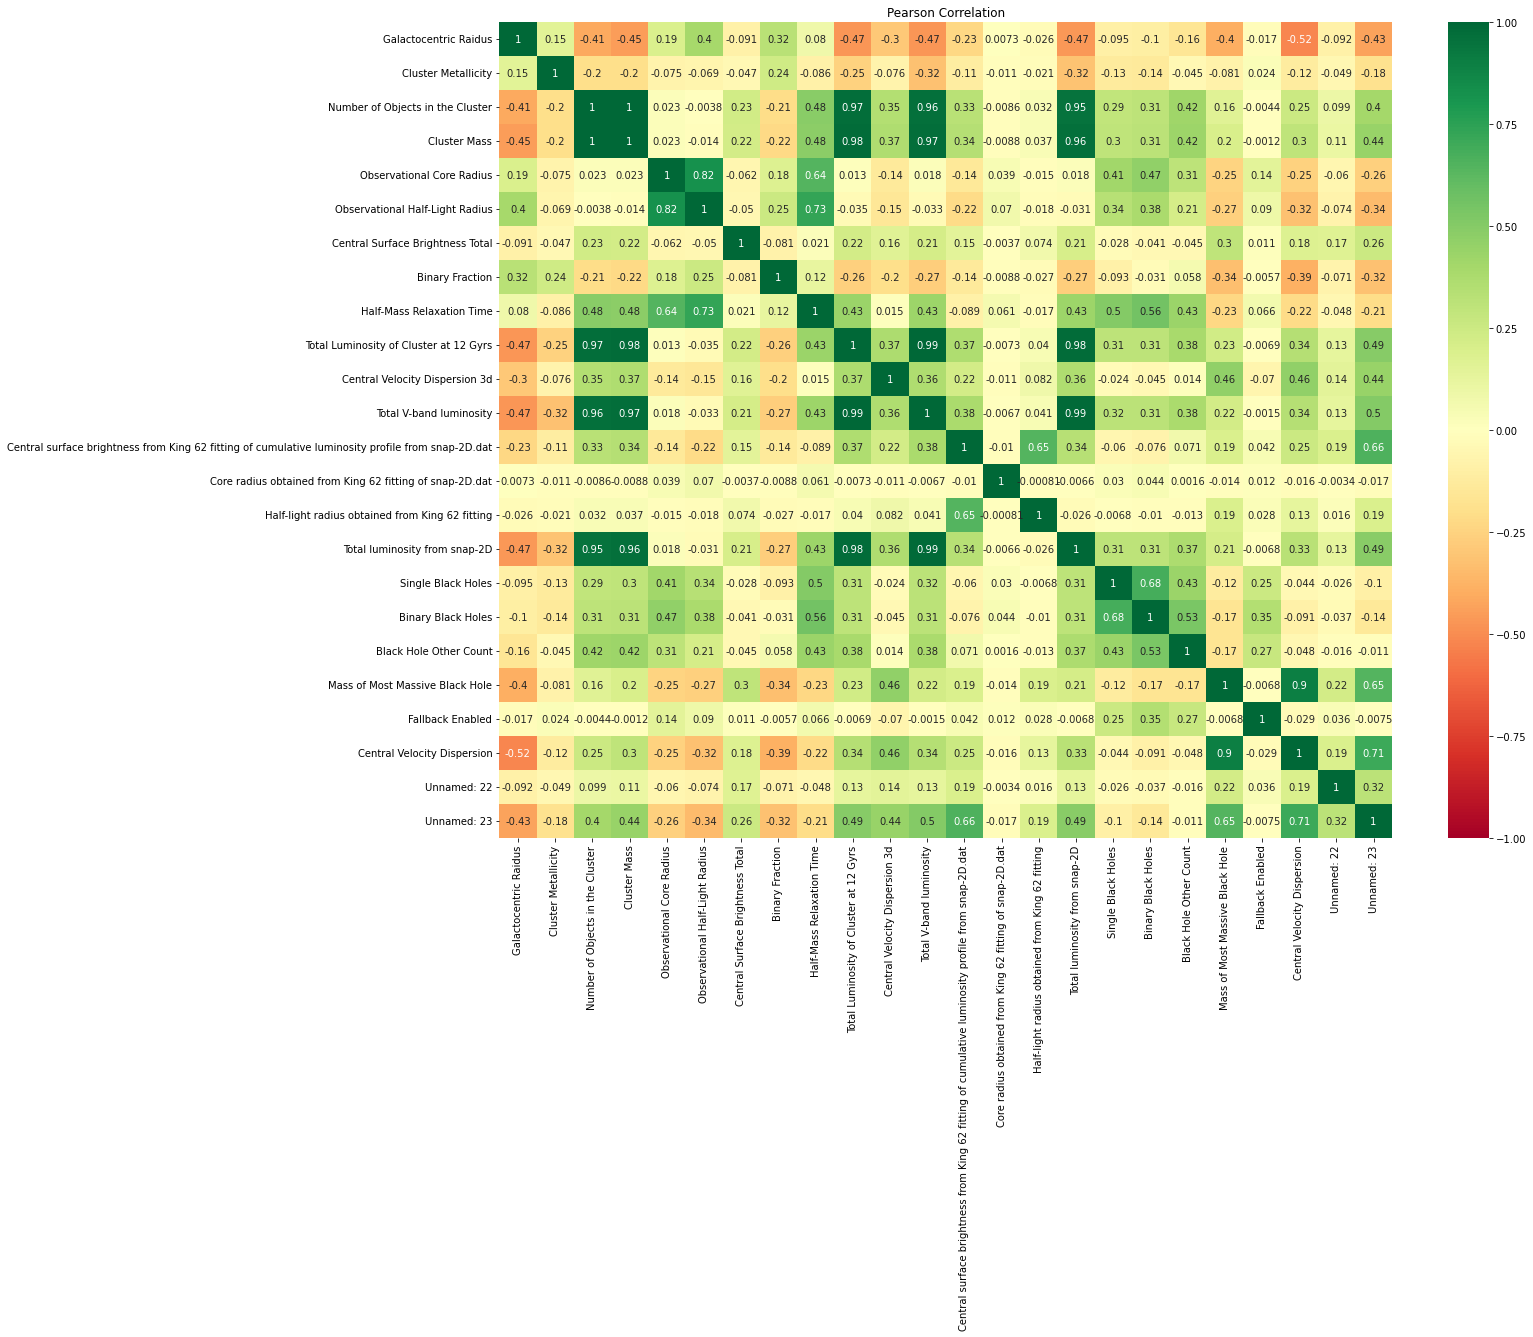

In [9]:
corr_pearson = data.corr(method='pearson')

fig = plt.figure(figsize = (20,15))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

<AxesSubplot:xlabel='Total V-band luminosity', ylabel='Cluster Mass'>

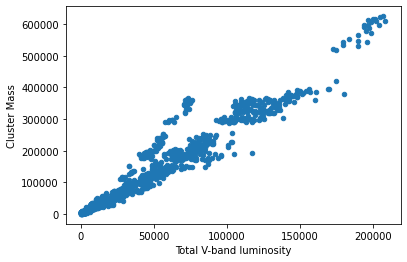

In [10]:
#Total V-band luminosity
#Cluster Mass
data.plot(kind='scatter',x = 'Total V-band luminosity',y = 'Cluster Mass')

In [11]:
df = data.dropna()
df4pca = df
# standardize first
df4pca_std = StandardScaler().fit_transform(df4pca)
# define 3D PCA
pc_model = PCA(n_components=3)
# apply PCA
pc = pc_model.fit_transform(df4pca_std)
# add to original data frame
df['pc_1'] = pc[:,0]
df['pc_2'] = pc[:,1]
df['pc_3'] = pc[:,2]
# show extended data frame
df.head()
df['size'] = 1
fig = px.scatter_3d(df, x='pc_1', y='pc_2', z='pc_3',
                    size='size',
                    size_max=10,
                    opacity=0.5)
fig.update_layout(title='PCA 3D')
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe